# Reversi
There are $n$x$n$ identical game pieces called disks (often spelled "discs"), which are light on one side and dark on the other. Players take turns placing disks on the board with their assigned color facing up. During a play, any disks of the opponent's color that are in a straight line and bounded by the disk just placed and another disk of the current player's color are turned over to the current player's color. The objective of the game is to have the majority of disks turned to display your color when the last playable empty square is filled or when a player cannot make any move.

### State Representation

Use an array of length $n^2$ to represent the board.

In [3]:
# X represents the dark player
# O represents the white player
# - represents an empty space

# draw the state
def draw(state):
    for i in range(0, n**2, n):
        print(state[i:i+n])

In [4]:
# A player must place a piece in an empty space so that 
# there exists at least one straight (horizontal, vertical, or diagonal) occupied line 
# between the new piece and another piece in the same color, 
# with one or more contiguous pieces in the other color between them.

# get actions of state
# valid actions depend on the current player
# game is end when no actions can be taken
def actions_in(state, player):
    actions = list()
    added = set()
    opponent = 'X' if player == 'O' else 'O'
    
    for i in range(n**2):
        if state[i] == player:
            row = i // n
            column = i % n
            
            # row
            for c in range(i, row*n+n):
                # get the sequence between the old and new piece (exclude new piece)
                temp = state[i : c]
                if state[c] == '-' and len(temp) > 0 and '-' not in temp and temp[-1] == opponent: 
                    if c not in added:
                        added.add(c)
                        actions.append(c)
                
            for c in range(i, row*n-1, -1):
                # get the sequence between the old and new piece (exclude new piece)
                temp = state[c+1 : i+1]
                if state[c] == '-' and len(temp) > 0 and '-' not in temp and temp[0] == opponent:
                    if c not in added:
                        added.add(c)
                        actions.append(c)
                
            # column
            for r in range(i, column+n**2-n+1, n):
                # get the sequence between the old and new piece (exclude new piece) 
                temp = state[i : r : n]
                if state[r] == '-' and len(temp) > 0 and '-' not in temp and temp[-1] == opponent:
                    if r not in added:
                        added.add(r)
                        actions.append(r)
                
            for r in range(i, column-1, -n):
                # get the sequence between the old and new piece (exclude new piece) 
                temp = state[r+n : i+1 : n]
                if state[r] == '-' and len(temp) > 0 and '-' not in temp and temp[0] == opponent:
                    if r not in added:
                        added.add(r)
                        actions.append(r)
                
            # diagonal
            diagonal_elements = min(n-1-row, n-1-column)
            for d1 in range(i, i+diagonal_elements*(n+1)+1, n+1):
                # get the sequence between the old and new piece (exclude new piece) 
                temp = state[i : d1 : n+1]
                if state[d1] == '-' and len(temp) > 0 and '-' not in temp and temp[-1] == opponent:
                    if d1 not in added:
                        added.add(d1)
                        actions.append(d1)    
            
            diagonal_elements = min(row, column)
            for d1 in range(i, i-diagonal_elements*(n+1)-1, -n-1):
                # get the sequence between the old and new piece (exclude new piece) 
                temp = state[d1+n+1 : i+1 : n+1]
                if state[d1] == '-' and len(temp) > 0 and '-' not in temp and temp[0] == opponent:
                    if d1 not in added:
                        added.add(d1)
                        actions.append(d1) 
            
            diagonal_elements = min(n-1-row, column)
            for d2 in range(i, i+diagonal_elements*(n-1)+1, n-1):
                # get the sequence between the old and new piece (exclude new piece) 
                temp = state[i : d2 : n-1]
                if state[d2] == '-' and len(temp) > 0 and '-' not in temp and temp[-1] == opponent:
                    if d2 not in added:
                        added.add(d2)
                        actions.append(d2)     
            
            diagonal_elements = min(row, n-1-column)
            for d2 in range(i, i-diagonal_elements*(n-1), -n+1):
                # get the sequence between the old and new piece (exclude new piece) 
                temp = state[d2+n-1 : i+1 : n-1]
                if state[d2] == '-' and len(temp) > 0 and '-' not in temp and temp[0] == opponent:
                    if d2 not in added:
                        added.add(d2)
                        actions.append(d2)  
        
    return actions

In [5]:
# get the successor of player
def successor(state, action, player):
    temp = state.copy()
    temp[action] = player
    opponent = 'X' if player == 'O' else 'O'
    
    # calcute the row and column of action
    row = action // n
    column = action % n
    
    # store pieces that need to be flipped
    changes = list()
    
    # flip pieces
    # change row
    # initialize pieces 
    pieces = list()
    for i in range(action+1, row*n + n):
        # if the piece is opponent, store it
        if temp[i] == opponent:
            # store pieces that may be flipped
            pieces.append(i)
            
        # reach the end point
        # if the piece is player, then flip pieces
        elif temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
                
        # if the piece is empty, nothing needs to be flipped
        elif temp[i] == '-':
            break
            
    pieces = list()       
    for i in range(action-1, row*n-1, -1):
        if temp[i] == opponent:
            pieces.append(i)
        elif temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        elif temp[i] == '-':
            break
    
    # change column
    pieces = list()
    for i in range(action+n, column+n**2-n+1, n):
        if temp[i] == opponent:
            pieces.append(i)
        if temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        if temp[i] == '-':
            pieces = list()
            break
            
    pieces = list()
    for i in range(action-n, column-1, -n):
        if temp[i] == opponent:
            pieces.append(i)
        if temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        if temp[i] == '-':
            pieces = list()
            break
    
    # change diagonal
    pieces = list()
    diagonal_elements = min(n-1-row, n-1-column)
    for i in range(action+n+1, action+diagonal_elements*(n+1)+1, n+1):
        if temp[i] == opponent:
            pieces.append(i)
        if temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        if temp[i] == '-':
            pieces = list()
            break
            
    pieces = list()
    diagonal_elements = min(row, column)
    for i in range(action-n-1, action-diagonal_elements*(n+1)-1, -n-1):
        if temp[i] == opponent:
            pieces.append(i)
        if temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        if temp[i] == '-':
            pieces = list()
            break
    
    pieces = list()
    diagonal_elements = min(n-1-row, column)
    for i in range(action+n-1, action+diagonal_elements*(n-1)+1, n-1):
        if temp[i] == opponent:
            pieces.append(i)
        if temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        if temp[i] == '-':
            pieces = list()
            break
            
    pieces = list()
    diagonal_elements = min(row, n-1-column)
    for i in range(action-n+1, action-diagonal_elements*(n-1), -n+1):
        if temp[i] == opponent:
            pieces.append(i)
        if temp[i] == player:
            if len(pieces) > 0:
                changes += pieces
                pieces = list()
                break
        if temp[i] == '-':
            pieces = list()
            break
    
    # flip pieces
    for change in changes:
        temp[change] = player
        
    return temp

### Evaluation

In [6]:
# evaluate the current state
# evaluation functions
# each piece is worth 1 pt
# score = (X_score - O_score)/n^2
def evaluateA(state):
    score = 0
    for p in state:
        if p == 'X':
            score += 1
        elif p == 'O':
            score -= 1
    return score / n**2

# It's impossible to flip the pieces at corners, 
# so a player who occupy more corners is more likely to win.
# Pieces on edges are less likely to be flipped,
# so a player may also want to occupy the edges.
# Each piece around the center is worth 1 pt.
# Each piece at a corner is worth 2 pts.
# Each piece on an edge is worth 1.5 pt.
def evaluateB(state):
    score = 0
    
    # total = corner + edge + center
    total = (4 * 2) + (4 * (n - 2) * 1.5) + ((n-2) ** 2)
    
    for i in range(len(state)):
        row = i // n
        column = i % n
        
        # weight of each piece
        weight = 2 if row == 0 and column == 0 or \
        row == 0 and column == n-1 or \
        row == n-1 and column == 0 or \
        row == n-1 and column == n-1 else \
        1.5 if (row == 0 or row == n-1) and column != 0 and column != n-1 or \
        (column == 0 or column == n-1) and row != 0 and row != n-1 else \
        1
        
        if state[i] == 'X':
            score += weight
        elif state[i] == 'O':
            score -= weight

    return score / total

# base_score = 1 if x > y,
#              -1 if x < y
# edge_score = differences in edges / (n-2)
# corner_score = differences in corners / 4 
# Since the optimal goal is to have the most pieces,
# the weight of base score is the highest, then corner score and edge score. 
# score = base*0.5 + corner*0.3 + edge*0.2
def evaluateC(state):
    score = 0
    corner = 0
    edge = 0
    
    for i in range(len(state)):
        row = i // n
        column = i % n
        
        # check corners
        if row == 0 and column == 0 or \
        row == 0 and column == n-1 or \
        row == n-1 and column == 0 or \
        row == n-1 and column == n-1:
            if state[i] == 'X':
                corner += 1
            elif state[i] == 'O':
                corner -= 1
        
        # check edges
        if (row == 0 or row == n-1) and column != 0 and column != n-1 or \
        (column == 0 or column == n-1) and row != 0 and row != n-1:
            if state[i] == 'X':
                edge += 1
            elif state[i] == 'O':
                edge -= 1
                
        if state[i] == 'X':
            score += 1
    
        elif state[i] == 'O':
            score -= 1
        
    if score > 0:
        base = 1
    elif score == 0:
        base = 0
    else:
        base = -1

    return base*0.5 + corner/4*0.3 + edge/(n-2)*0.2

### Utility

In [7]:
# return the utility of the state
# game ends when all spaces are filled or when a player cannot make any move
# 1: X wins
# -1: O wins
def utility(state, player):
    if len(actions_in(state, player)) == 0:
        score = 0
        for p in state:
            if p == 'X':
                score += 1
            elif p == 'O':
                score -= 1
        if score > 0:
            return 1
        elif score == 0:
            return 0
        elif score < 0:
            return -1
        
    return None

### Search

In [8]:
from math import inf

# minmax search
def max_value(state, alpha, beta, depth, limit, evaluate):
    player = 'X'
    opponent = 'O'
    u = utility(state, player)
    if depth == limit or u is not None:
        if u is not None:
            return (u, None)
        else:
            return (evaluate(state), None)
    else:
        v = -inf
        actions = actions_in(state, player)
        for action in actions:
            temp = min_value(successor(state, action, player), alpha, beta, depth+1, limit, evaluate)[0]
            if temp > v:
                v = temp
                a = action
            if v > alpha:
                alpha = v
            if alpha >= beta:
                break
     
        return v, a
    
def min_value(state, alpha, beta, depth, limit, evaluate):
    player = 'O'
    opponent = 'X'
    u = utility(state, player)
    if depth == limit or u is not None:
        if u is not None:
            return (u, None)
        else:
            return (evaluate(state), None)
    else:
        v = inf
        actions = actions_in(state, player)
        for action in actions:
            temp = max_value(successor(state, action, player), alpha, beta, depth+1, limit, evaluate)[0]
            if temp < v:
                v = temp
                a = action
            if v < beta:
                beta = v
            if alpha >= beta:
                break
                
        return v, a

### Experiments

In [15]:
from random import choice
import matplotlib.pyplot as plt
n = 8 # board size

# returns a standard reversi
def standard():
    state = ['-'] * n**2
    state[27] = 'O'
    state[28] = 'X'
    state[35] = 'X'
    state[36] = 'O'
    return state

# Test an evaluation function against a random player or another evaluation function.
# cap: max searching depth
# ai: evaluation function
# opponent: evaluation function for the opponent
def experiment(cap, ai, opponent=None):
    cap += 1
    records = list()
    depths = list()
    playernames = {evaluateA: "AI A",
                 evaluateB: "AI B",
                 evaluateC: "AI C",
                 None: "a random player"}
    
    if opponent is None:
        for limit in range(1, cap):
            record = [0, 0, 0] # This will store [ties, wins, losses]
            depths.append(str(limit))

            for game in range(100):
                # standard reversi
                state = standard()
                
                for turn in range(n**2):
                    if turn % 2 == 0:
                        value, action = max_value(state, alpha=-1, beta=+1, depth=0, limit=limit, evaluate=ai)
                        if action is not None:
                            state = successor(state, action, 'X')
                        else:
                            u = utility(state, 'X')
                            if u is not None:
                                record[u] += 1 # Some negative indexing shenanigans here
                                break
                    else:
                        actions = actions_in(state, 'O')
                        if len(actions) > 0:
                            action = choice(actions)
                            state = successor(state, action, 'O')
                        else:
                            u = utility(state, 'O')
                            if u is not None:
                                record[u] += 1 # Some negative indexing shenanigans here
                                break
                                
            records.append(record)
            print("{0} searching to depth {1} has a record of {2} against {3}".format(playernames[ai], limit, record, playernames[opponent]))
               
    else:
        for limit in range(1, cap):
            record = [0, 0, 0] # This will store [ties, wins, losses]
            depths.append(str(limit))
            for game in range(100):
                # generate a random state
                state = standard()
                actions = actions_in(state, 'X')
                action = choice(actions)
                state = successor(state, action, 'X')
                actions = actions_in(state, 'O')
                action = choice(actions)
                state = successor(state, action, 'O')
                
                for turn in range(n**2):
                    if turn % 2 == 0:
                        value, action = max_value(state, alpha=-1, beta=+1, depth=0, limit=limit, evaluate=ai)
                        if action is not None:
                            state = successor(state, action, 'X')
                        else:
                            u = utility(state, 'X')
                            if u is not None:
                                record[u] += 1 # Some negative indexing shenanigans here
                                break
                    else:
                        value, action = min_value(state, alpha=-1, beta=+1, depth=0, limit=limit, evaluate=opponent)
                        if action is not None:
                            state = successor(state, action, 'O')
                        else:
                            u = utility(state, 'O')
                            if u is not None:
                                record[u] += 1 # Some negative indexing shenanigans here
                                break

            records.append(record)
            print("{0} searching to depth {1} has a record of {2} against {3}".format(playernames[ai], limit, record, playernames[opponent]))

    ties = list()
    wins = list()
    for r in records:
        ties.append(r[0])
        wins.append(r[1])

    return depths, ties, wins

# plot
def plot(experiment):
    depths, ties, wins = experiment
    plt.bar(depths, wins, label="Wins")
    plt.bar(depths, ties, bottom=wins, label="Ties")
    plt.title("Player Performance Comparison")
    plt.xlabel("Searching Depth")
    plt.ylabel("Win Percentage")
    plt.legend()
    plt.show()

#### Performance of each evaluation funciton against a random player

AI A searching to depth 1 has a record of [3, 80, 17] against a random player
AI A searching to depth 2 has a record of [3, 85, 12] against a random player
AI A searching to depth 3 has a record of [1, 96, 3] against a random player


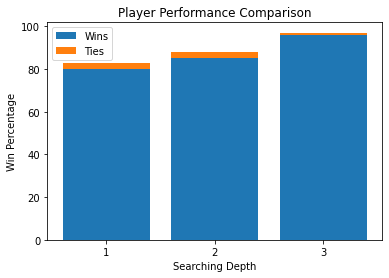

AI B searching to depth 1 has a record of [2, 86, 12] against a random player
AI B searching to depth 2 has a record of [1, 92, 7] against a random player
AI B searching to depth 3 has a record of [1, 96, 3] against a random player


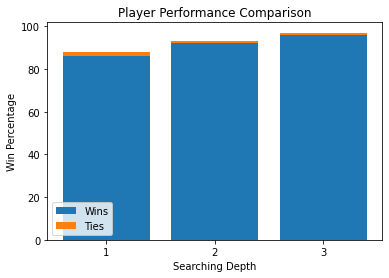

AI C searching to depth 1 has a record of [2, 80, 18] against a random player
AI C searching to depth 2 has a record of [0, 98, 2] against a random player
AI C searching to depth 3 has a record of [0, 99, 1] against a random player


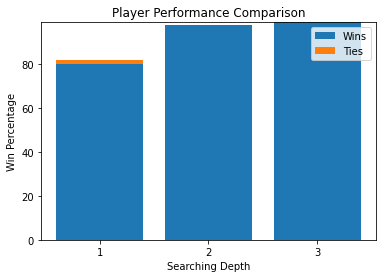

In [16]:
exp1 = experiment(3, evaluateA)
plot(exp1)
exp2 = experiment(3, evaluateB)
plot(exp2)
exp3 = experiment(3, evaluateC)
plot(exp3)

In [26]:
avgA = sum(exp1[2]) / len(exp1[2])
avgB = sum(exp2[2]) / len(exp2[2])
avgC = sum(exp3[2]) / len(exp3[2])
print("Average win percentage: \nA: {0}\nB: {1}\nC: {2}".format(avgA, avgB, avgC))

Average win percentage: 
A: 87.0
B: 91.33333333333333
C: 92.33333333333333


As the searching depth increases, the win percentage of each evaluation function against a random player increases. Both B and C perform better than A in matches against random players. 

#### Performance of each evaluation function against another evaluation function

AI B searching to depth 1 has a record of [8, 41, 51] against AI A
AI B searching to depth 2 has a record of [14, 50, 36] against AI A
AI B searching to depth 3 has a record of [0, 71, 29] against AI A


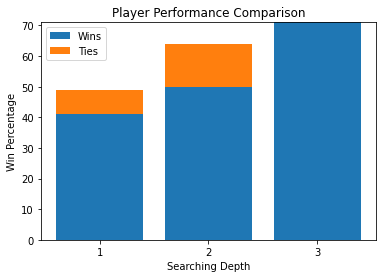

AI C searching to depth 1 has a record of [0, 58, 42] against AI A
AI C searching to depth 2 has a record of [0, 51, 49] against AI A
AI C searching to depth 3 has a record of [0, 90, 10] against AI A


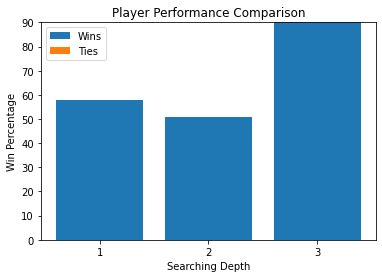

AI C searching to depth 1 has a record of [0, 65, 35] against AI B
AI C searching to depth 2 has a record of [0, 67, 33] against AI B
AI C searching to depth 3 has a record of [0, 83, 17] against AI B


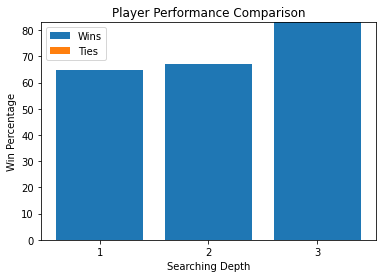

In [17]:
exp4 = experiment(3, evaluateB, evaluateA) # B vs. A
plot(exp4)
exp5 = experiment(3, evaluateC, evaluateA) # C vs. A
plot(exp5)
exp6 = experiment(3, evaluateC, evaluateB) # C vs. B
plot(exp6)

When the searching depth is relatively low (1 or 2), B and C doesn't show great advantages over A. When the searching depth reaches 3, both B and C perform better than A. The third graph shows that C is better than B.

#### Conclusion

Both evaluation B and evaluation C improve the permance of a play in a match against a random player, and evaluation C is the best evaluation function with respect to the improvement of win percentage.